In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [39]:
df.size

879189

In [40]:
df.shape

(51717, 17)

In [41]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

### Checking if there is any null value.

In [42]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

###  Checking if there is any duplicate value.

In [43]:
df.duplicated().sum()


0

### function to convert rate string in numeric

In [44]:
def convert_rate(rate):
    if isinstance(rate, str):  
        try:
            numerator, denominator = rate.split('/')
            return float(numerator) / float(denominator)
        except ValueError:  
            return None
    elif isinstance(rate, (float, int)):  
        return rate  
    else:
        return None  

df['rate_numeric'] = df['rate'].apply(convert_rate)

print(df[['rate', 'rate_numeric']])

         rate  rate_numeric
0       4.1/5          0.82
1       4.1/5          0.82
2       3.8/5          0.76
3       3.7/5          0.74
4       3.8/5          0.76
...       ...           ...
51712  3.6 /5          0.72
51713     NaN           NaN
51714     NaN           NaN
51715  4.3 /5          0.86
51716  3.4 /5          0.68

[51717 rows x 2 columns]


###  changing datatype

In [110]:
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'].str.replace(',',''))

In [111]:
df.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                            object
votes                            int64
location                        object
rest_type                       object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
rate_numeric                   float64
dtype: object

###  Handling null value

In [46]:
df['rate_numeric'].value_counts()

0.78    3972
0.76    3873
0.74    3821
0.72    3316
0.80    3183
0.82    2948
0.70    2784
0.68    2476
0.66    2310
0.84    2184
0.64    1873
0.86    1693
0.62    1561
0.88    1147
0.60    1023
0.58     802
0.90     656
0.56     600
0.54     307
0.92     300
0.52     260
0.94     167
0.50     101
0.48      70
0.96      66
0.98      55
0.46      51
0.44      26
0.42      24
0.40      11
0.36       5
Name: rate_numeric, dtype: int64

In [47]:
df['rate_numeric'] = df['rate_numeric'].fillna(0.78)

In [48]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
rate_numeric                       0
dtype: int64

In [49]:
df['location'].value_counts()

BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [50]:
df['location'] = df['location'].fillna('BTM')
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                           0
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
rate_numeric                       0
dtype: int64

In [51]:
df['rest_type'].value_counts()

Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

In [52]:
df['rest_type'] = df['rest_type'].fillna('Quick Bites')
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                           0
rest_type                          0
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
rate_numeric                       0
dtype: int64

In [53]:
df.drop(['phone','dish_liked'],axis=1,inplace = True)
df.isnull().sum()

url                               0
address                           0
name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                          0
rest_type                         0
cuisines                         45
approx_cost(for two people)     346
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
rate_numeric                      0
dtype: int64

In [54]:
df['cuisines'].value_counts()

North Indian                                   2913
North Indian, Chinese                          2385
South Indian                                   1828
Biryani                                         918
Bakery, Desserts                                911
                                               ... 
North Indian, Chinese, South Indian, Juices       1
North Indian, Chinese, Kebab, Mughlai             1
Chinese, Vietnamese, Thai, Malaysian              1
Arabian, Lebanese, Chinese, Rolls                 1
North Indian, Chinese, Arabian, Momos             1
Name: cuisines, Length: 2723, dtype: int64

In [55]:
df['cuisines'] = df['cuisines'].fillna('North Indian')
df['approx_cost(for two people)'].value_counts()

300      7576
400      6562
500      4980
200      4857
600      3714
         ... 
60          1
5,000       1
3,700       1
469         1
160         1
Name: approx_cost(for two people), Length: 70, dtype: int64

In [112]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].fillna(7576)
df.isnull().sum()

url                               0
address                           0
name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                          0
rest_type                         0
cuisines                          0
approx_cost(for two people)       0
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
rate_numeric                      0
dtype: int64

In [57]:
df.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                            object
votes                            int64
location                        object
rest_type                       object
cuisines                        object
approx_cost(for two people)     object
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
rate_numeric                   float64
dtype: object

In [58]:
df.shape

(51717, 16)

In [67]:
df['cuisines']

0                North Indian, Mughlai, Chinese
1                   Chinese, North Indian, Thai
2                        Cafe, Mexican, Italian
3                    South Indian, North Indian
4                      North Indian, Rajasthani
                          ...                  
51712                               Continental
51713                               Finger Food
51714                               Finger Food
51715                               Finger Food
51716    Finger Food, North Indian, Continental
Name: cuisines, Length: 51717, dtype: object

###  Creating categorical columns and numeric columns for EDA.

In [172]:
cat_cols = ['online_order','book_table','location',
            'listed_in(type)','listed_in(city)']
num_cols = ['votes','rate_numeric','rest_type',
            'approx_cost(for two people)']

###  EDA

####  1) Countplot for cat_cols

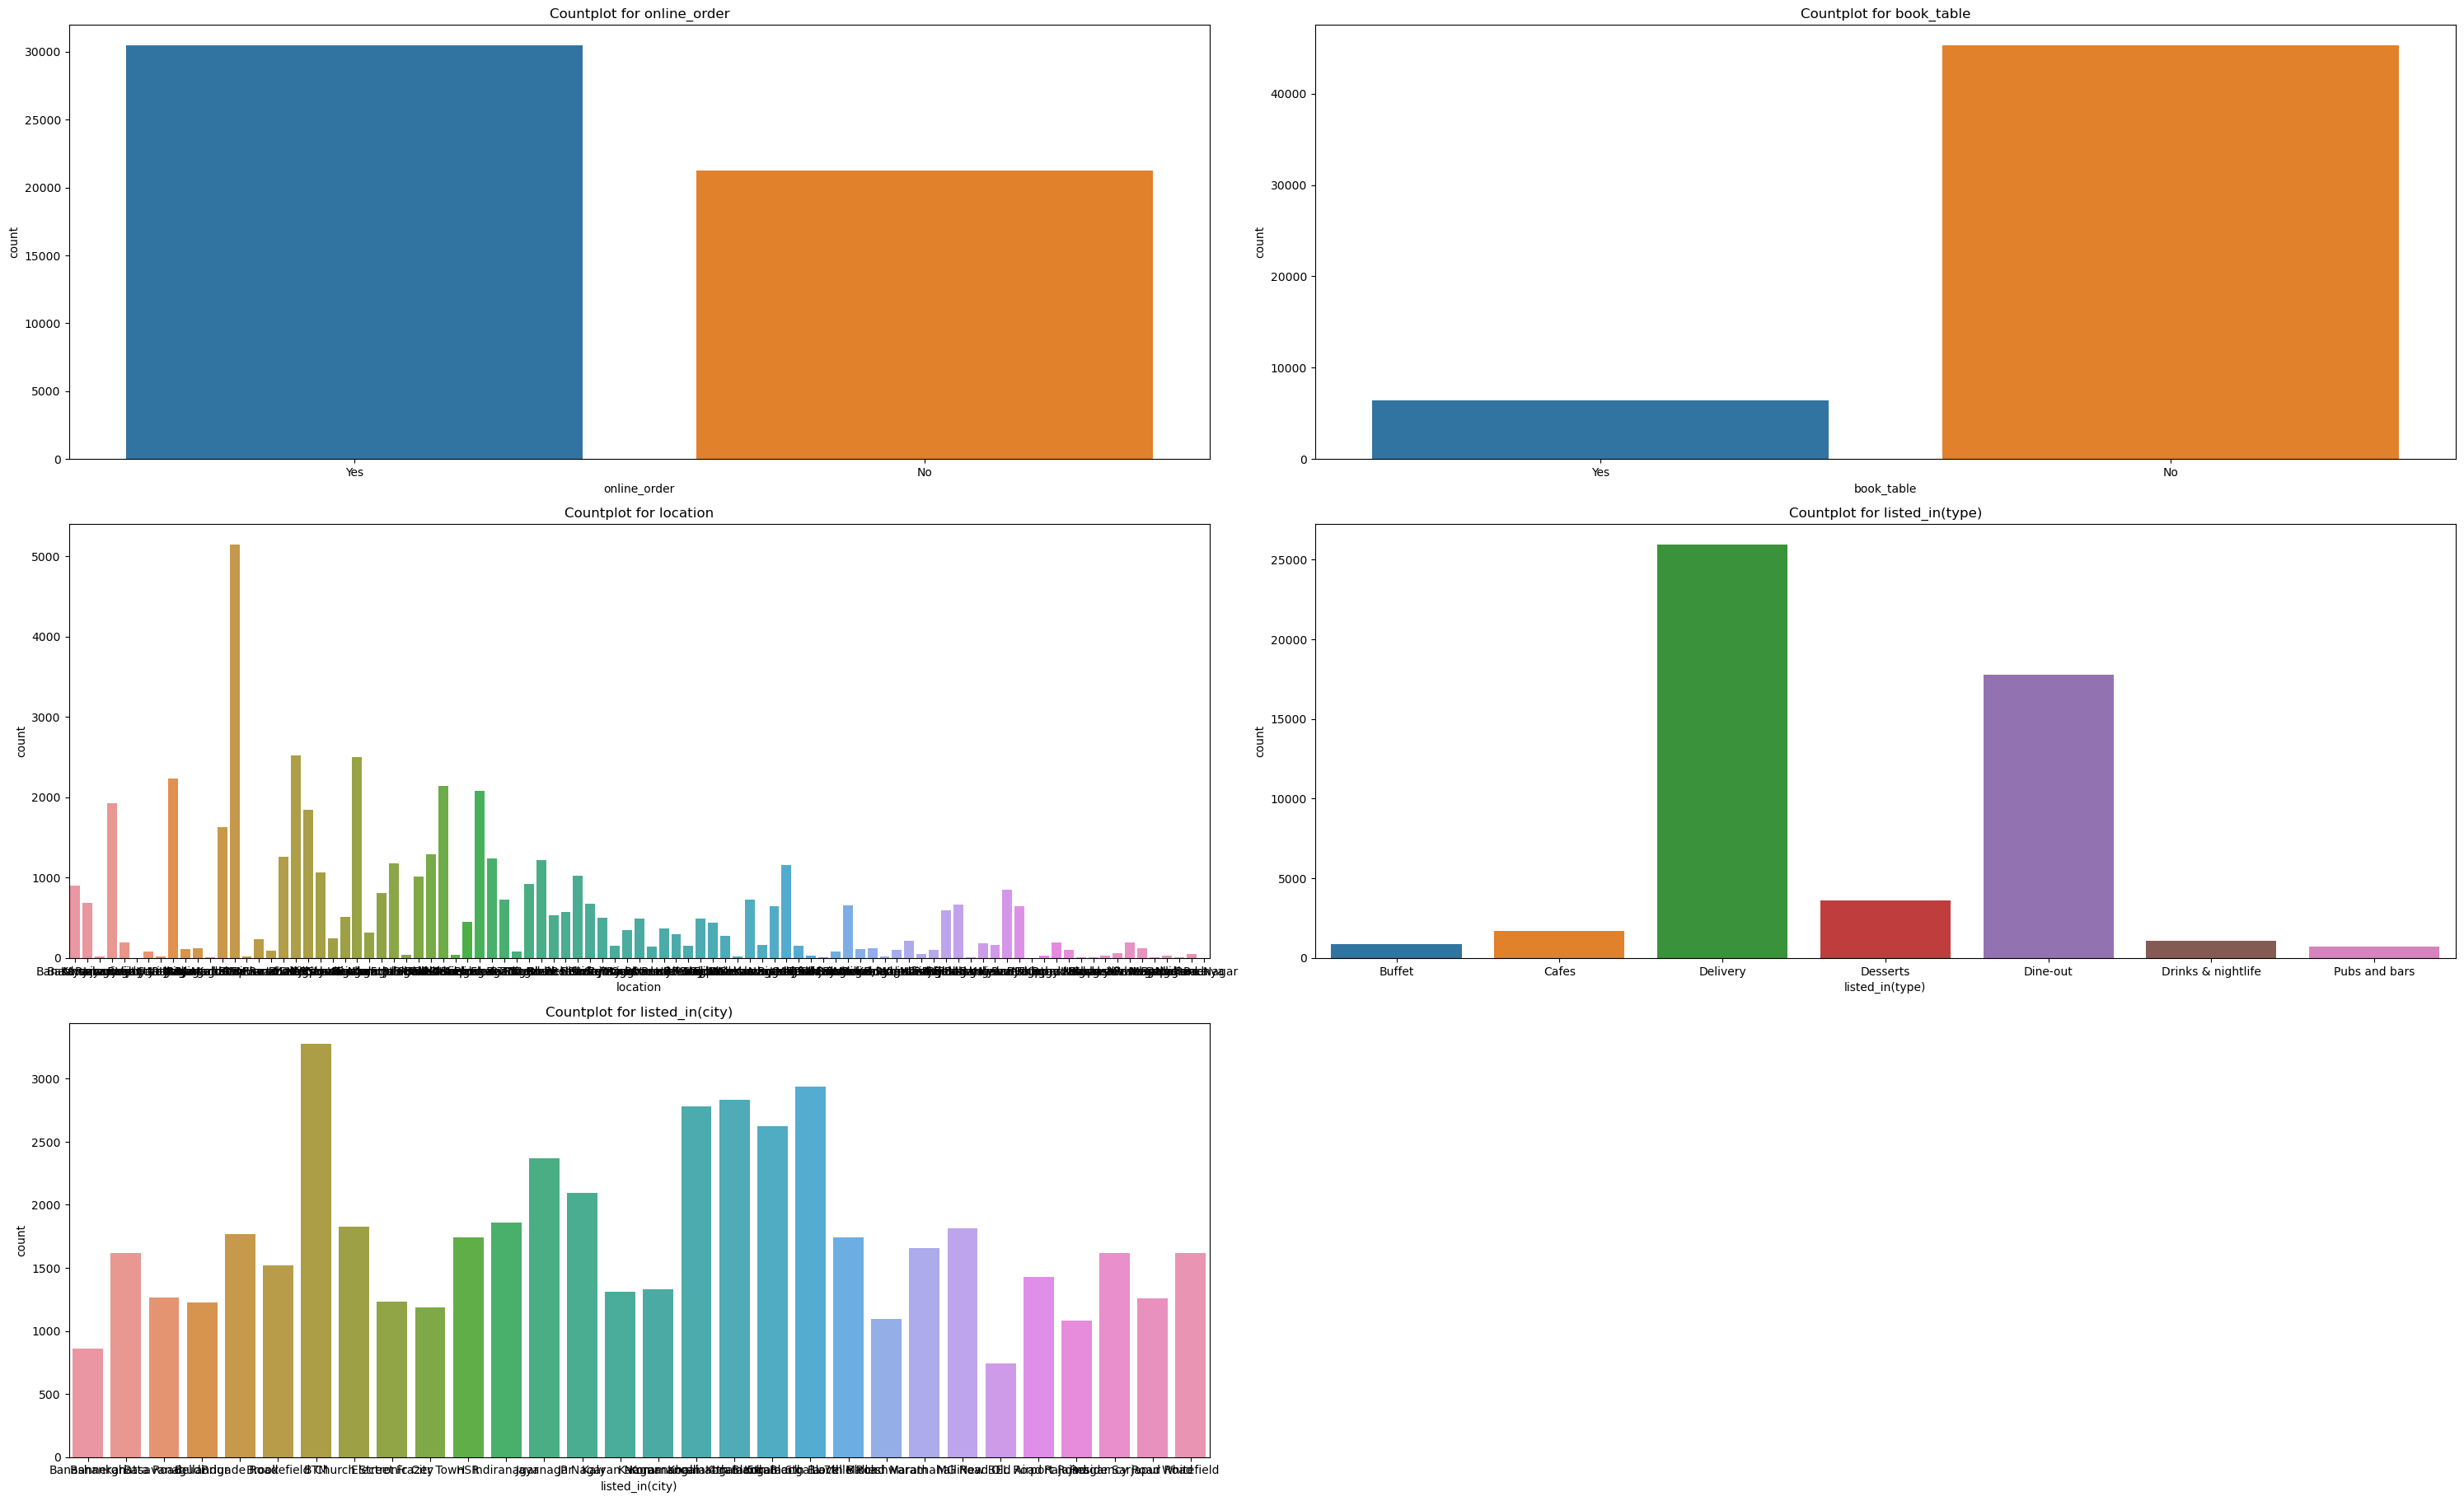

In [116]:
plt.figure(figsize=(30,30))
for i in range(len(cat_cols)):
    plt.subplot(5,2,i+1)
    sns.countplot(x=df[cat_cols[i]])
    plt.title(f'Countplot for {cat_cols[i]}')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='count', ylabel='location'>

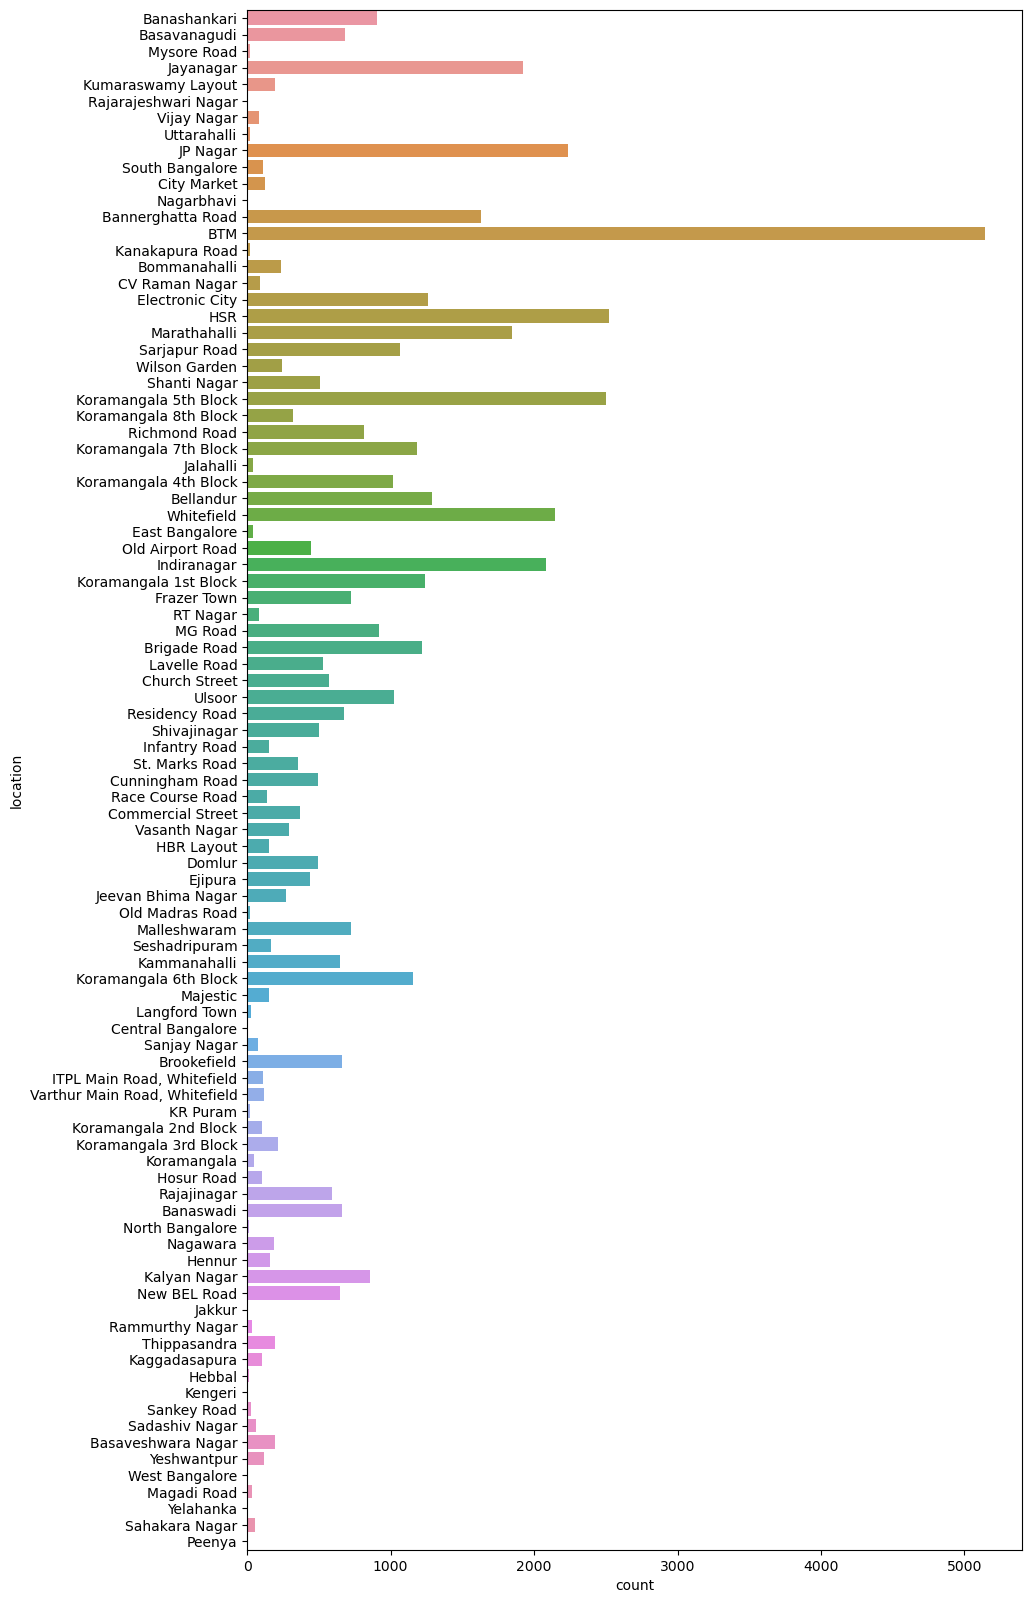

In [90]:
plt.figure(figsize=(10,20))
sns.countplot(y = df['location'])

<AxesSubplot:xlabel='count', ylabel='rest_type'>

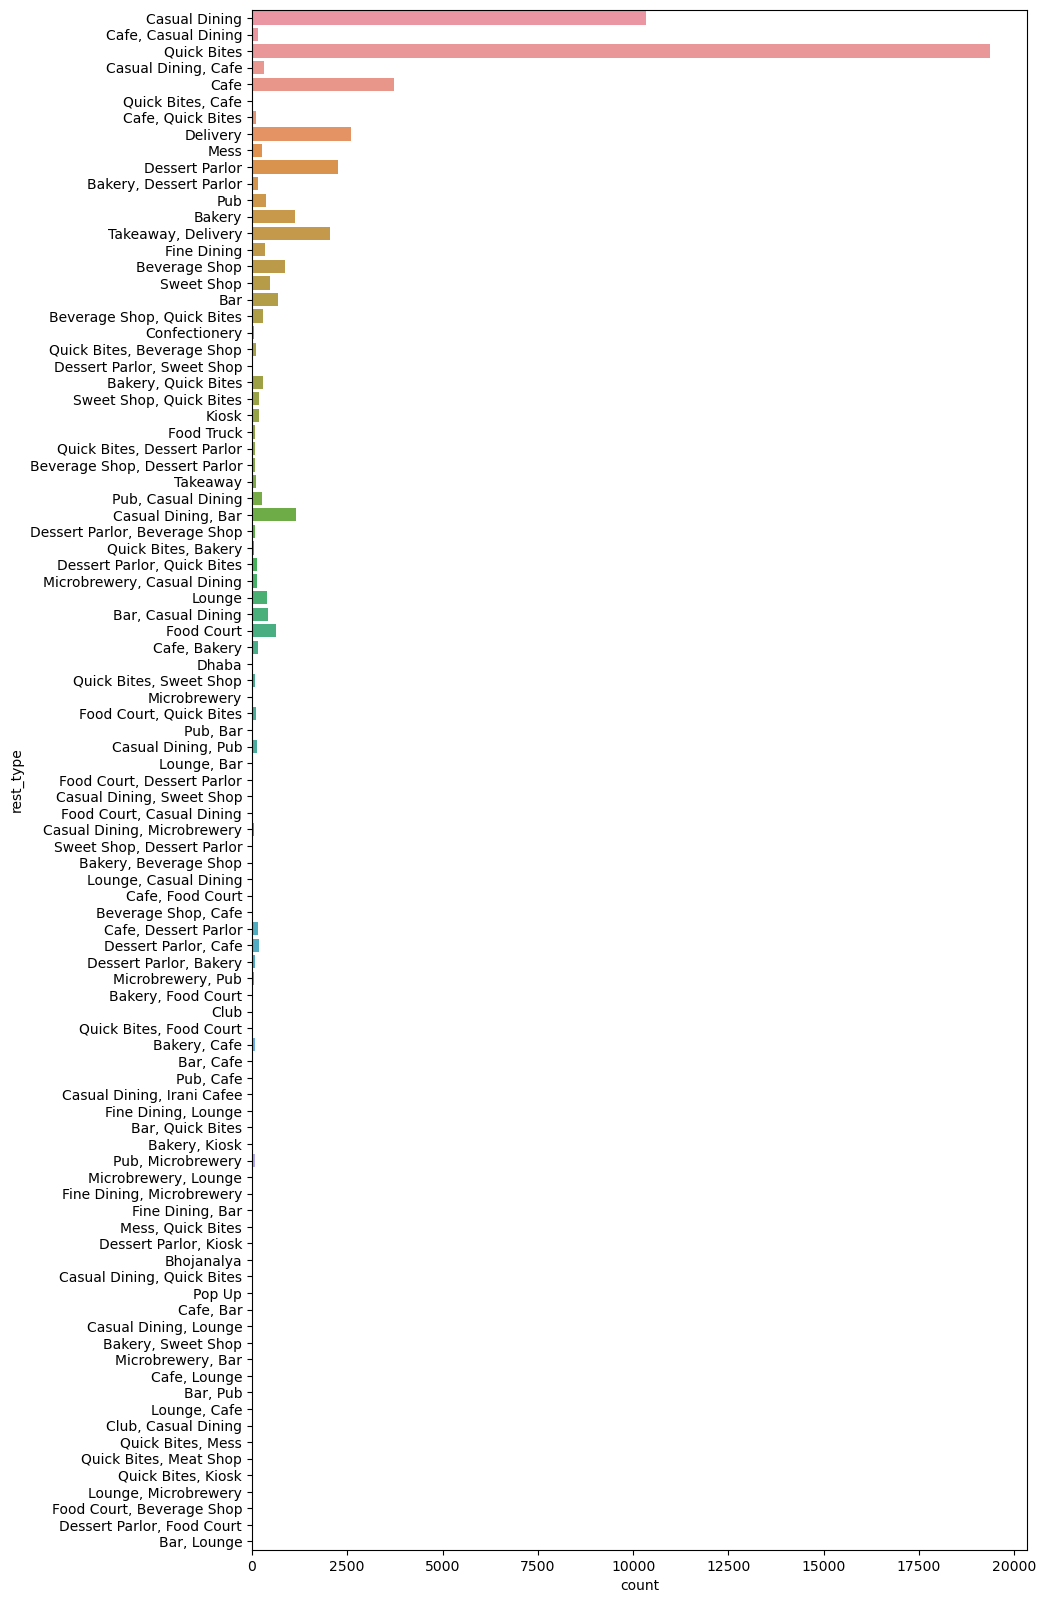

In [88]:
plt.figure(figsize=(10,20))
sns.countplot(y = df['rest_type'])

<AxesSubplot:xlabel='listed_in(type)', ylabel='count'>

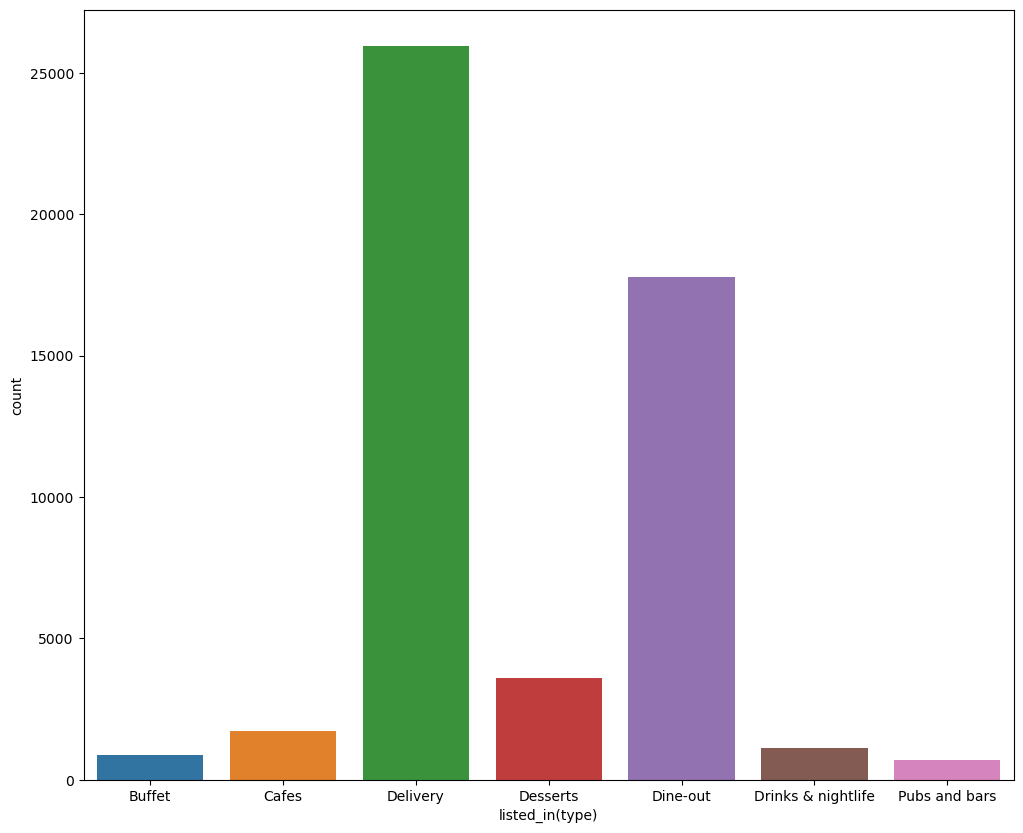

In [93]:
plt.figure(figsize=(12,10))
sns.countplot(x = df['listed_in(type)'])

#### 2) Swam plot

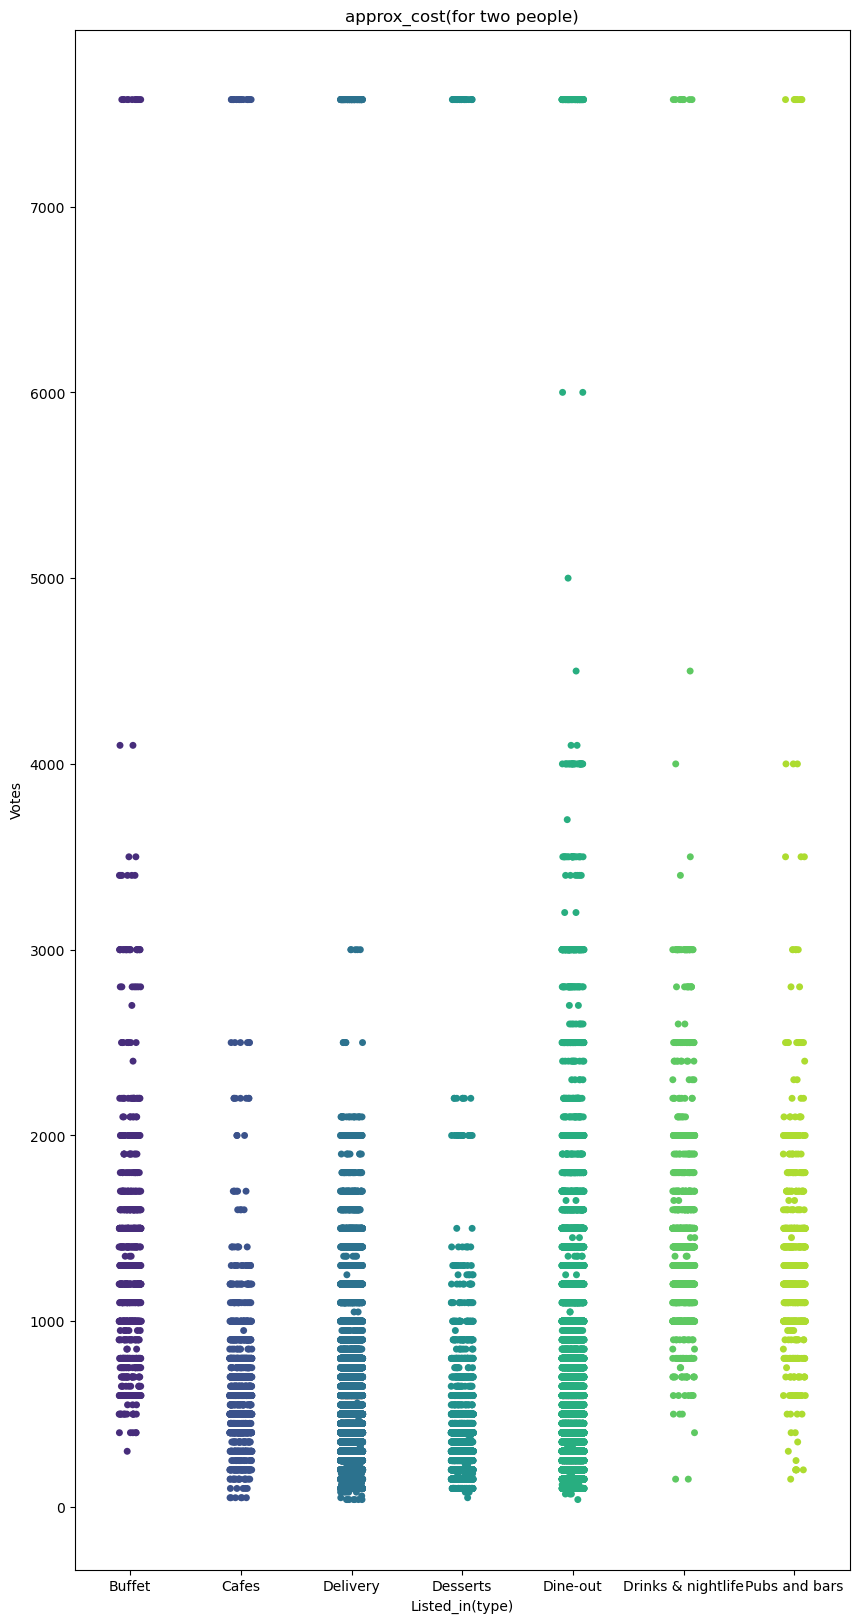

In [117]:
plt.figure(figsize=(10,20))
sns.stripplot(x=df['listed_in(type)'],y=df['approx_cost(for two people)'], data = df , palette='viridis')
plt.title('approx_cost(for two people)')
plt.xlabel('Listed_in(type)')
plt.ylabel('Votes')
plt.show()

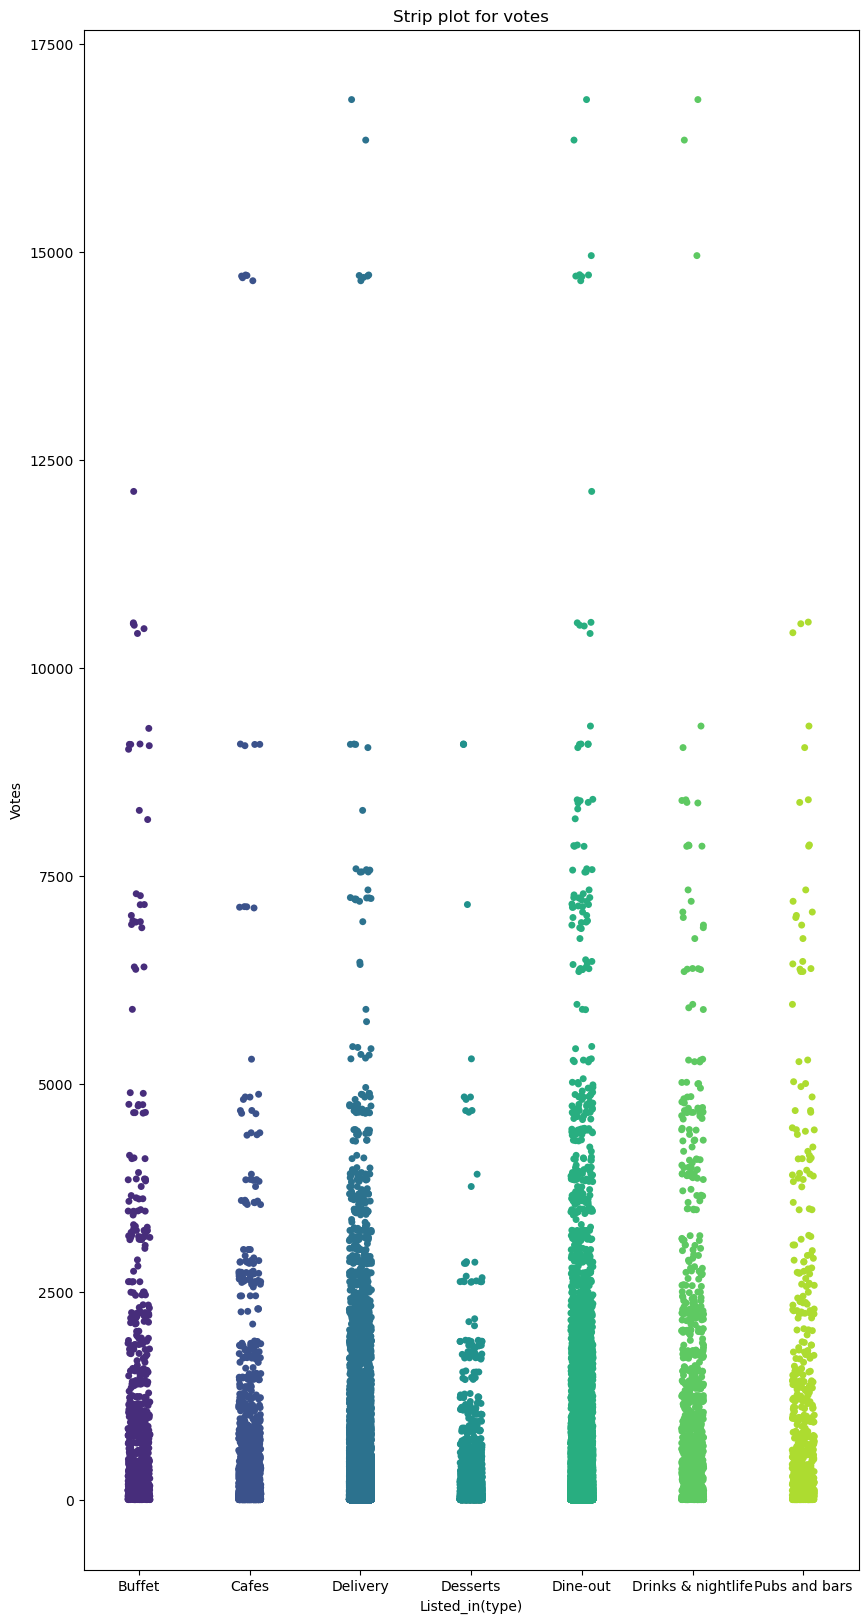

In [102]:
plt.figure(figsize=(10,20))
sns.stripplot(x=df['listed_in(type)'],y=df['votes'], data = df , palette='viridis')
plt.title('Strip plot for votes')
plt.xlabel('Listed_in(type)')
plt.ylabel('Votes')
plt.show()

In [128]:
df1 = df.groupby('location')['approx_cost(for two people)'].max().reset_index().head(5)
df1

,location,approx_cost(for two people)
0,BTM,7576.0
1,Banashankari,1300.0
2,Banaswadi,7576.0
3,Bannerghatta Road,7576.0
4,Basavanagudi,2200.0


####  top 5 location having high approx_cost(for two people).

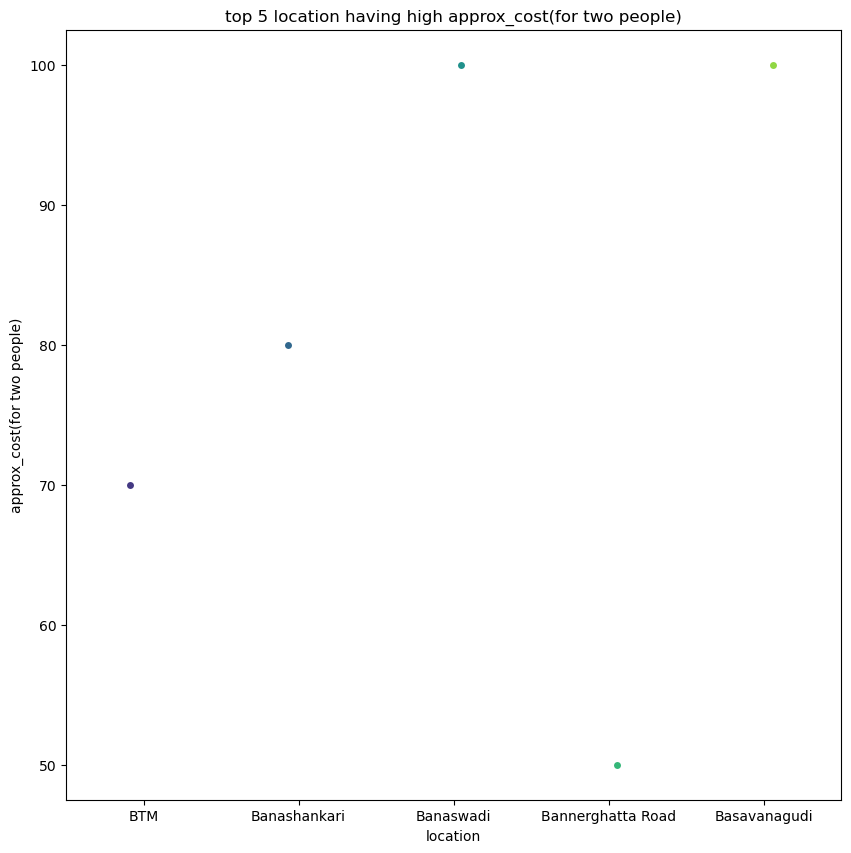

In [138]:
plt.figure(figsize=(10,10))
sns.stripplot(x=df1['location'],y=df1['approx_cost(for two people)'], data = df , palette='viridis')
plt.title('top 5 location having high approx_cost(for two people)')
plt.xlabel('location')
plt.ylabel('approx_cost(for two people)')
plt.show()

#### top 5 location having minimum approx_cost(for two people)

In [136]:
df2 = df.groupby('location')['approx_cost(for two people)'].min().reset_index().tail(5)
df2

,location,approx_cost(for two people)
88,West Bangalore,200.0
89,Whitefield,100.0
90,Wilson Garden,100.0
91,Yelahanka,250.0
92,Yeshwantpur,100.0


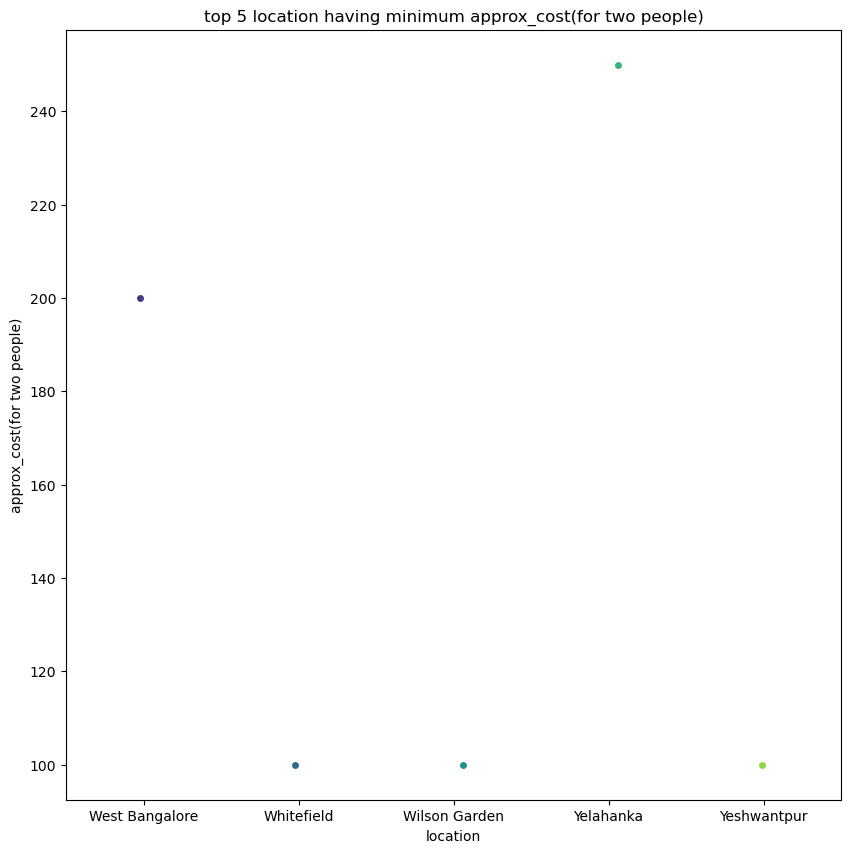

In [139]:
plt.figure(figsize=(10,10))
sns.stripplot(x=df2['location'],y=df2['approx_cost(for two people)'], data = df , palette='viridis')
plt.title('top 5 location having minimum approx_cost(for two people)')
plt.xlabel('location')
plt.ylabel('approx_cost(for two people)')
plt.show()

#### top 5 listed_in(type) having max votes

In [152]:
df3 = df.groupby('listed_in(type)')['votes'].max().reset_index().head(5)
df3

,listed_in(type),votes
0,Buffet,12121
1,Cafes,14723
2,Delivery,16832
3,Desserts,9085
4,Dine-out,16832


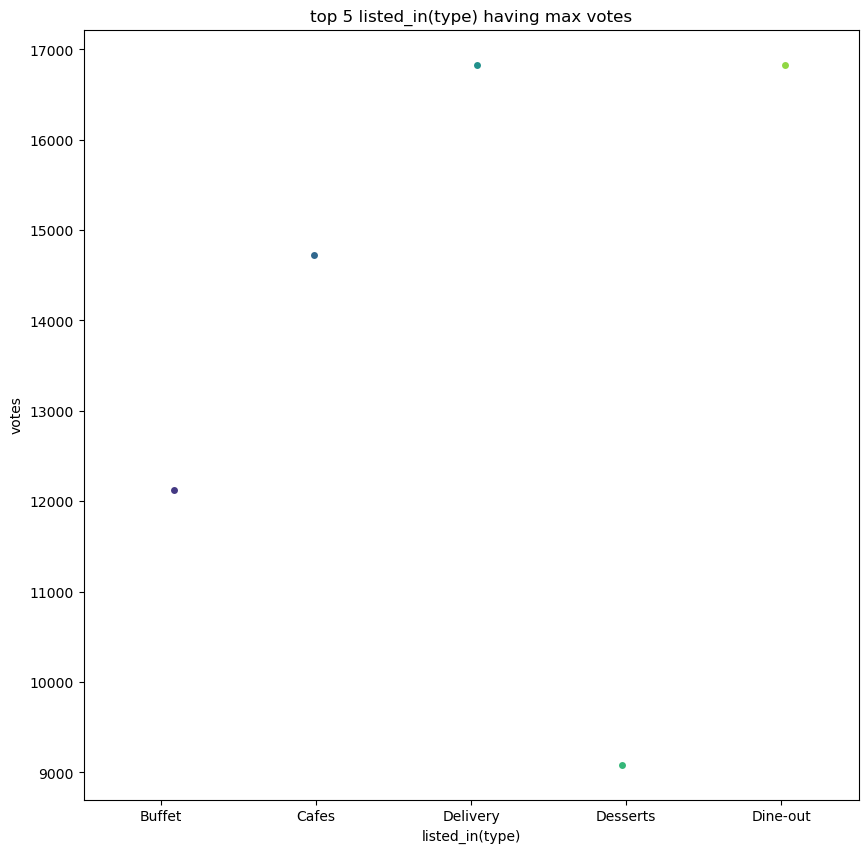

In [153]:
plt.figure(figsize=(10,10))
sns.stripplot(x=df3['listed_in(type)'],y=df3['votes'], data = df , palette='viridis')
plt.title('top 5 listed_in(type) having max votes')
plt.xlabel('listed_in(type)')
plt.ylabel('votes')
plt.show()

#### top 5 listed_in(type) having avg votes

In [150]:
df4 = df.groupby('listed_in(type)')['votes'].mean().reset_index().head(5)
df4

,listed_in(type),votes
0,Buffet,1008.433107
1,Cafes,479.893790
2,Delivery,203.964922
3,Desserts,150.652380
4,Dine-out,289.968390


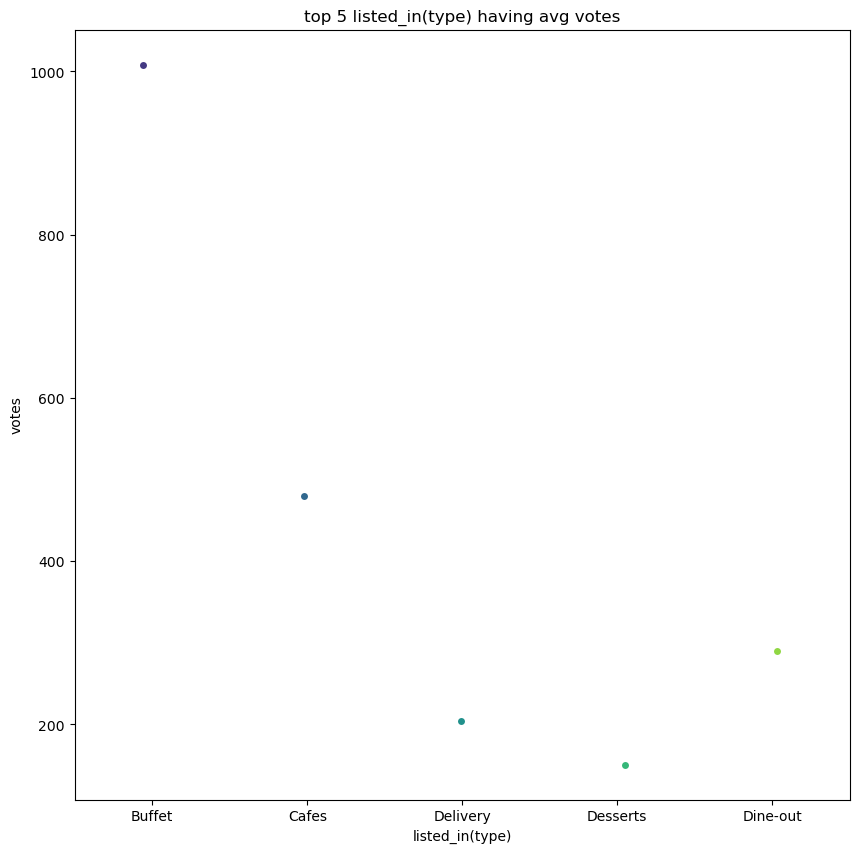

In [151]:
plt.figure(figsize=(10,10))
sns.stripplot(x=df4['listed_in(type)'],y=df4['votes'], data = df , palette='viridis')
plt.title('top 5 listed_in(type) having avg votes')
plt.xlabel('listed_in(type)')
plt.ylabel('votes')
plt.show()

#### top 5 location having high rating

In [161]:
df5 =df.groupby('location')['rate_numeric'].min().reset_index().tail(5)
df5

,location,rate_numeric
88,West Bangalore,0.66
89,Whitefield,0.48
90,Wilson Garden,0.60
91,Yelahanka,0.68
92,Yeshwantpur,0.56


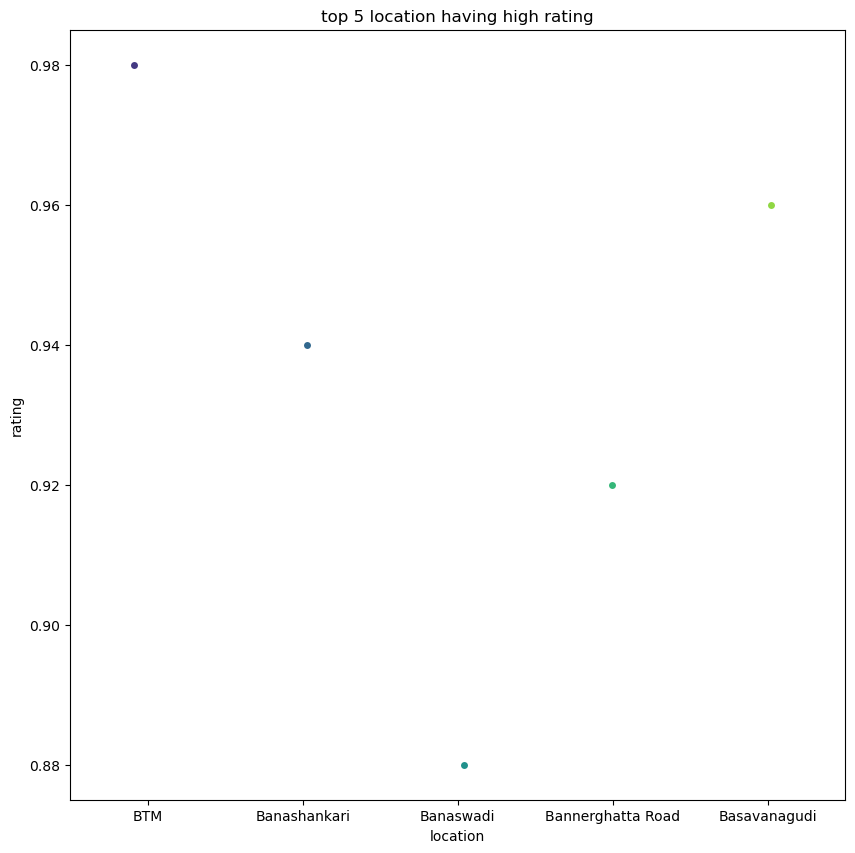

In [157]:
plt.figure(figsize=(10,10))
sns.stripplot(x=df5['location'],y=df5['rate_numeric'], data = df , palette='viridis')
plt.title('top 5 location having high rating')
plt.xlabel('location')
plt.ylabel('rating')
plt.show()

#### top 5 location having low rating 

In [162]:
df6 =df.groupby('location')['rate_numeric'].min().reset_index().tail(5)
df6

,location,rate_numeric
88,West Bangalore,0.66
89,Whitefield,0.48
90,Wilson Garden,0.60
91,Yelahanka,0.68
92,Yeshwantpur,0.56


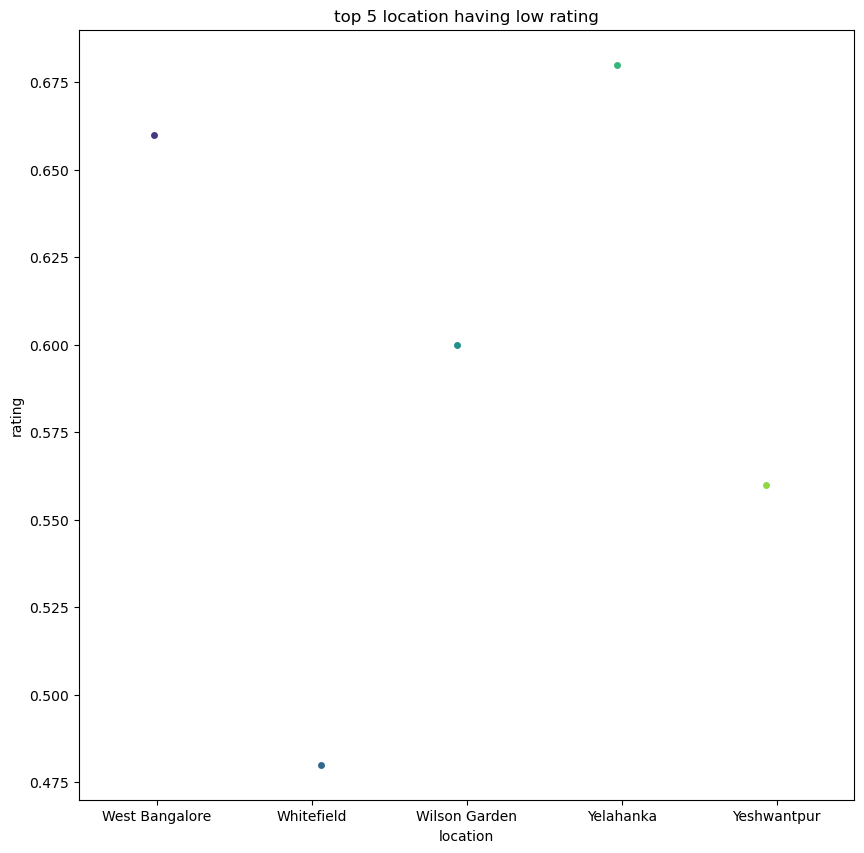

In [163]:
plt.figure(figsize=(10,10))
sns.stripplot(x=df6['location'],y=df6['rate_numeric'], data = df , palette='viridis')
plt.title('top 5 location having low rating')
plt.xlabel('location')
plt.ylabel('rating')
plt.show()